# K Nearest Neighbor

'''
K Nearest Neighbor is a simple algorithm that stores all the available cases and classified the new data or
case based on a similarity measure

it is a non parametric supervised learning technique

K = Number of nearest neighbors

Example: Amazon recommonded system
more than 35% of amazon revenue is generated by its recommondation engine

Example: Searching similar documents in google

'''


We can implement a KNN model by following the below steps:

1. Load the data
2. Initialise the value of k
3. For getting the predicted class, iterate from 1 to total number of training data points
4. Calculate the distance between test data and each row of training data. Here we will use Euclidean distance as our distance metric since it’s the most popular method. The other metrics that can be used are Chebyshev, cosine, etc.
5. Sort the calculated distances in ascending order based on distance values
6. Get top k rows from the sorted array
7. Get the most frequent class of these rows
8. Return the predicted class

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import set_config
set_config(print_changed_only=False)

In [2]:
from sklearn.datasets import load_iris
iris=load_iris()

In [3]:
df= pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
df['target']=iris.target

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [7]:
x= df.drop(['target','flower_name'],axis='columns')
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
y=df.target

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [10]:
x_train.shape

(120, 4)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics




In [12]:
#try running from k=1 to k=10 and record testing accuracy

k_range= range(1,10)
scores = {}
scores_list = []
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    scores[k]= metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Testing Accuracy')

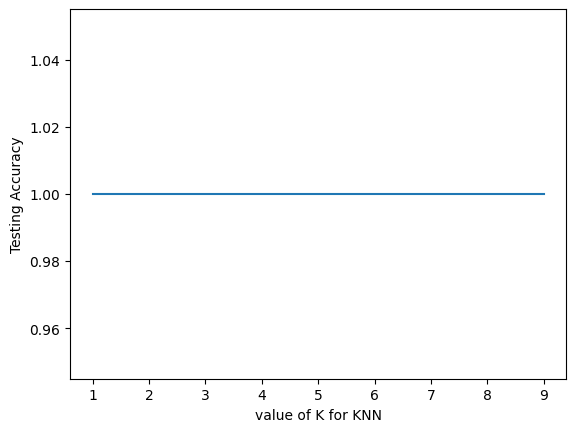

In [13]:
#plot the relationship between k and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel("value of K for KNN")
plt.ylabel("Testing Accuracy")

In [14]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x,y)
classes ={0:'setosa',1:'versicolor',2:'virginica'}

# Making prediction on unknown data
x_new=[[3,4,3,2],[5,4,2,2]]
y_predict = knn.predict(x_new)
print(classes[y_predict[0]])
print(classes[y_predict[1]])

versicolor
setosa


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

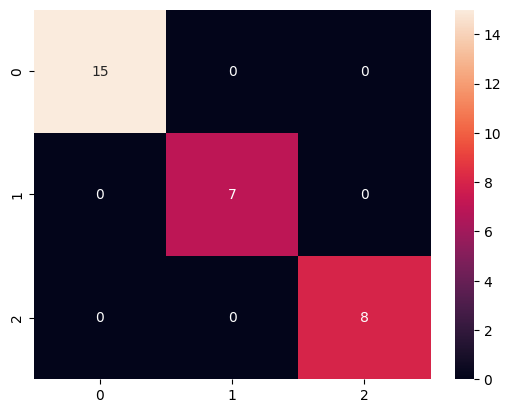

In [15]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")